<a href="https://colab.research.google.com/github/DanieloSendi/MachineLearning/blob/main/Lab2_Getting_Started_with_DNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1 Binary classification problem**

Two-class classification, or binary classification, may be the most widely applied kind of machine learning problem. The aim of this lab is to classify movie reviews into “positive” reviews and “negative” reviews, just based on the text content of the reviews.

## Load the IMDB dataset from Keras

We'll be working with the “IMDB dataset”, a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [ ]:
from tensorflow import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


 The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

## Preparing the data
We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:
- We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as the first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).
- We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as the first layer in our network a Dense layer, capable of handling floating-point vector data.

Implement the second solution:

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


## Network architecture
Based on the previous ex. please implement a deep network architecture shown in the following Figure:

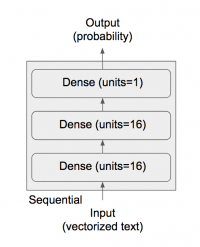

I propose the following architecture choice:

- Two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review.
- The intermediate layers will use relu as their “activation function”, and the final layer will use a <ins>`sigmoid`</ins> activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”, i.e. how likely the review is to be positive).
- A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid “squashes” arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.

In [ ]:
#TODO: Implement the architecture

import tensorflow as tf
from keras import models, layers

# Initialize the sequential model
model = models.Sequential()

# Add the first intermediate layer with 16 units and ReLU activation
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Add the second intermediate layer with 16 units and ReLU activation
model.add(layers.Dense(16, activation='relu'))

# Add the final layer with 1 unit and a sigmoid activation for binary classification output
model.add(layers.Dense(1, activation='sigmoid'))


## Network training
Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss. It isn't the only viable choice: you could use, for instance, mean_squared_error. But `crossentropy` is usually the best choice when you are dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the “distance” between probability distributions, or in our case, between the ground-truth distribution and our predictions.

To configure the model please use the following parameters:
- `rmsprop` optimizer
- `binary_crossentropy` loss function
- `accuracy` metric

In [ ]:
#TODO: Compile the model

# Compile the model
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
# Display the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Validation
In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a “validation set” by setting apart 10,000 samples from the original data (suggested split: 25000 train, 10000 validation, 15000 test). You can do it manually or use `train_test_split` from `sklearn` library:

In [ ]:
#TODO: please divide the dataset according to the description above
from sklearn.model_selection import train_test_split

# we'll split the x_train and y_train to create the validation set.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10000, random_state=42)


Train the model with following parameters:
- x_train, y_train -remained
- epochs - 20
- batch_size - 512
- validation_data=(x_val, y_val))

In [ ]:
#TODO: Train the model

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 7s 66ms/step - loss: 0.5328 - accuracy: 0.7796 - val_loss: 0.4145 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3382 - accuracy: 0.8897 - val_loss: 0.3293 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2551 - accuracy: 0.9179 - val_loss: 0.2959 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2047 - accuracy: 0.9345 - val_loss: 0.3080 - val_accuracy: 0.8728
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1715 - accuracy: 0.9453 - val_loss: 0.2926 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1472 - accuracy: 0.9532 - val_loss: 0.3258 - val_accuracy: 0.8727
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1283 - accuracy: 0.9585 - val_loss: 0.3139 - val_accuracy: 0.8782
Epoch 8/20
30

The network should achieve acc: 0.9998 and val_acc: 0.8683.

The history = model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Please use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy.

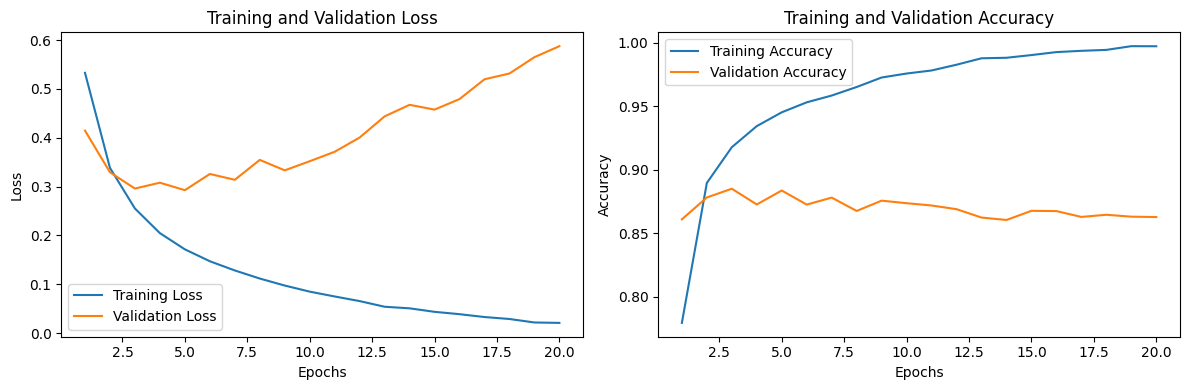

In [ ]:
#TODO: plot

import matplotlib.pyplot as plt

# Get the training history
history = model.history.history

# Extract training and validation loss and accuracy
training_loss = history['loss']
validation_loss = history['val_loss']
training_accuracy = history['accuracy']
validation_accuracy = history['val_accuracy']

# Create subplots
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. In precise terms, what you are seeing is “overfitting”: after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

Please check how that model performs on the test set too!!

In [ ]:
#TODO: evaluate the results on the test set

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

782/782 [==============================] - 2s 3ms/step - loss: 0.5928 - accuracy: 0.8556
Test Loss: 0.5928
Test Accuracy: 0.8556


# **Part 2 Hyperparameters**

As we stated before, there is no ideal solution to each deep learning task. To decide how many layers to add or which activation functions use you need practice and usually a lot of trials and errors. Some people even say that implementing a neural network from scratch is more art than science.

### **Parameter optimisation**

Even then, after you decide what your model will look like, there is a matter of training, which also requires additional parameters. These numbers, that you already encountered, like a number of epochs, learning rate or optimizer are called hyperparameters. Training a neural network is basically an optimization problem, so you can think of setting those parameters as optimizing an optimization. It's not an easy task. There are, however, some tools that can help with that.

### **Callbacks**

One of the simplest methods helpful in parameter selection is using Callbacks. These are basic functions that let you act on the model during training. They allow you to interrupt training to save a model, load a different weight set, or otherwise alter the state of the model. Here are some examples of ways you can use callbacks:

- Model checkpointing—saving the current weights of the model at different points during training.
- Early stopping—interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
- Dynamically adjusting the value of certain parameters during training — such as the learning rate of the optimizer.
- Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated.

There are many default methods that you can explore in `keras.callbacks` such as `ModelCheckpoint`, `EarlyStopping` or `LearningRateScheduler`. However, one of the most useful things is that you can define your own callback and pass it to the model. So first, check if the desired functionality is available in Keras and if it isn't write it yourself.

To do so, you can use functions that trigger when certain action occurs:

- `on_epoch_begin`
- `on_epoch_end`
- `on_batch_begin`
- `on_batch_end`
- `on_train_begin`
- `on_train_end`

You can define function behavior after the trigger. In an example below, we check after each epoch if the training accuracy reaches a certain threshold (in this case 90%). If it does, we stop training. This is a useful method to decide on a number of epochs and avoid overfitting. You can read more about callbacks in [Keras Callbacks Documentation](https://keras.io/api/callbacks).

First, you need to define a callback class:

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

Then create a callback instance and pass it as an argument when using `.fit()` or `.fit_generator()`:

In [ ]:
callbacks = myCallback()

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9901
Reached 90% accuracy so cancelling training!
469/469 [==============================] - 2s 4ms/step - loss: 0.0309 - accuracy: 0.9901


Your task is to use it on a mnist classification (lab 1) or imdb (lab 2). You can change parameters or callback behaviour as you wish, as long as it succeeds to stop training earlier.

## **Optimisation algorithms from sklearn**

There are various algorithms that automatically set different parameters, run training, and repeat the process. For example, the Scikit-Learn library provides [Grid Search Method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [Random Search Method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). You can read more about them in the documentation. More sophisticated methods, like genetic algorithms or particle swarm optimization, are sometimes used too.

Your last task this week is to use Grid Search Optimisation algorithm to optimise one of the networks from previous weeks. Choose two parameters (for example number of epochs and batch size) and try two different values for each parameter. Grid Search method will therefore create a mesh of these parameters, with four elements (2×2). This process will take more time and computation power, as it will basically train the model four times and compare results. If you don't have a good computer it is best to try it on simple mnist or imdb classification.

In [ ]:
!pip install scikeras
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

def create_model():
    network = models.Sequential()
    # network.add(#TO DO)
    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))

    network.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    return network

model = KerasClassifier(build_fn=create_model)

# Define grid search parameters
par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

# grid_results = grid.fit(X,Y)
grid_results = grid.fit(x_train,y_train)

# Print best results
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
313/313 [==============================] - 2s 4ms/step - loss: 0.3870 - accuracy: 0.8406
Epoch 2/3
313/313 [==============================] - 1s 4ms/step - loss: 0.1634 - accuracy: 0.9421
Epoch 3/3
157/157 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
313/313 [==============================] - 2s 4ms/step - loss: 0.3818 - accuracy: 0.8399
Epoch 2/3
313/313 [==============================] - 2s 8ms/step - loss: 0.1598 - accuracy: 0.9441
Epoch 3/3
157/157 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
313/313 [==============================] - 2s 4ms/step - loss: 0.3810 - accuracy: 0.8339
Epoch 2/3
313/313 [==============================] - 1s 4ms/step - loss: 0.1550 - accuracy: 0.9440
Epoch 3/3
157/157 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
313/313 [==============================] - 4s 7ms/step - loss: 0.3877 - accuracy: 0.8323
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1674 - accuracy: 0.9430
Epoch 3/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0881 - accuracy: 0.9718
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9888
Epoch 5/5
157/157 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
313/313 [==============================] - 3s 4ms/step - loss: 0.3959 - accuracy: 0.8293
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1647 - accuracy: 0.9427
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.9742
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0448 - accuracy: 0.9888
Epoch 5/5
157/157 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


## **Optimisation algorithms from Keras (optional)**

One of the latest trends in Deep Learning (first introduced in 2019) is Keras Autotuner. Basically, it follows the same idea as the Scikit-Learn approach described above (Grid Search, Random Search or other) but is provided by Keras. If you want, you can try it instead of the above. However, you need to have `keras-tuner` installed, which requires `Python 3.6+` and `TensorFlow 2.0+`. If you cannot install new libraries (because for example it is forbidden on classroom PC), continue with the Scikit-learn approach.

- [Keras Tuner - Documentation](https://keras.io/keras_tuner/)
- [Keras Tuner - Tutorial](https://keras.io/keras_tuner/)
- [Keras Tuner - training parameters](https://github.com/keras-team/keras-tuner/issues/122)

Wrap a model inside a function, with optimised parameters as arguments. In the example below we optimise the number of neurons in a Dense layer.

In [ ]:
# Define the parameterized model
def build_model(hp):
    network = models.Sequential()

    # Use hp.Int to specify the number of units in the Dense layer, range from 16 to 64 with a step size of 16
    network.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=64, step=16), activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    network.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

    return network

Set up a Random Search tuner (there are many different tuners available) with a model, objective function and max number of iterations. Then run search with all the parameters that you would normally pass to a `fit` funtion.

In [ ]:
!pip install keras-tuner --upgrade
import keras_tuner

# Set up Keras Tuner's RandomSearch
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

# Run the hyperparameter search
tuner.search(train_images, train_labels, epochs=5, batch_size=128, validation_data=(val_images, val_labels))

# Get the model with the best hyperparameters
best_model = tuner.get_best_models()[0]
